In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import hvplot.pandas  # Ensure hvplot is imported
from bokeh.io import output_notebook, show
output_notebook()  # Enables rendering in notebooks


Loading BokehJS ...

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
df_market_data_scaled_data = scaler.fit_transform(df_market_data)

In [6]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(df_market_data_scaled_data, index=df_market_data.index, columns=df_market_data.columns)

# Copy the crypto names from the original DataFrame
crypto_names = df_market_data.index.tolist()

# Set the coin_id column as index
df_market_data_scaled.index = crypto_names

# Display the scaled DataFrame
display(df_market_data_scaled.head())

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 12)

In [8]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_market_data_scaled)
    inertia_values.append(kmeans.inertia_)

c:\Users\ntrie\anaconda3\envs\my_dev\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ntrie\anaconda3\envs\my_dev\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\ntrie\anaconda3\envs\my_dev\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\ntrie\anaconda3\envs\my_dev\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\ntrie\anaconda3\envs\my_dev\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(exec

In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': list(k_values), 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

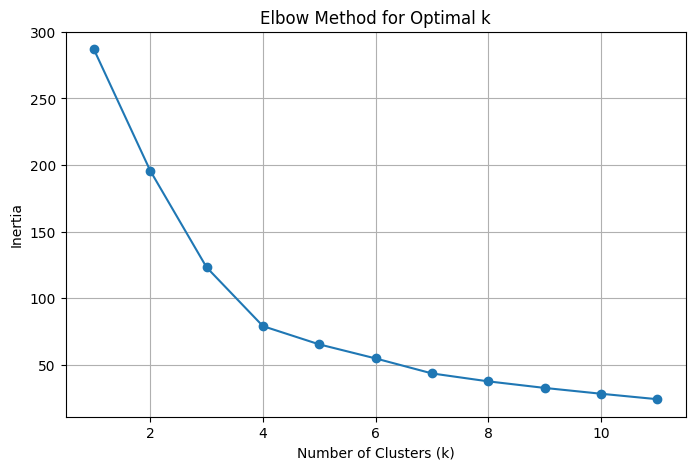

In [10]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The answer is 4. 

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [11]:
# Initialize the K-Means model using the best value for k
best_k = 4  # Adjust based on the elbow method analysis
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
best_k = 4  # Adjust based on the elbow method analysis


In [12]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(df_market_data_scaled)


c:\Users\ntrie\anaconda3\envs\my_dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init=10, random_state=42)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
y_kmeans = kmeans.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(y_kmeans)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [14]:
# Create a copy of the scaled DataFrame
# Create a copy of the scaled DataFrame
scaled_df_copy = df_market_data_scaled.copy()

In [15]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
scaled_df_copy = df_market_data_scaled.copy()
scaled_df_copy['cluster'] = kmeans.predict(df_market_data_scaled)
# Copy the crypto names from the original scaled DataFrame
coin_id = df_market_data_scaled.index.tolist()
# Set the coin_id column as index
scaled_df_copy.index = coin_id
# Display the copy of the scaled DataFrame
display(scaled_df_copy.head())


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [28]:
# Create the scatter plot, referencing the index directly for hovering
scaled_df_copy.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='cluster',  # Ensure correct cluster column is used
    hover_cols=['index']  # 'index' will display the coin_id
)





:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,index)

---

### Optimize Clusters with Principal Component Analysis.

In [29]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [30]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(df_market_data_scaled)

# View the scaled PCA data
df_pca = pd.DataFrame(pca_data, index=df_market_data_scaled.index, columns=['PC1', 'PC2', 'PC3'])
display(df_pca.head())



,PC1,PC2,PC3
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [31]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")
# Total expalined variance
explained_variance = pca.explained_variance_ratio_.sum()
print(f"Total Explained Variance: {explained_variance:.2f}")



Explained Variance Ratio: [0.3719856  0.34700813 0.17603793]
Total Explained Variance: 0.90


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total Explained Variance is .90 

In [32]:
# Create a new DataFrame with the PCA data.
pca = PCA(n_components=3)
pca_data = pca.fit_transform(df_market_data_scaled)
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original scaled DataFrame
crypto_names = df_market_data_scaled.index.tolist()

# Set the coin_id column as index
df_pca.index = crypto_names

# Display the scaled PCA DataFrame
display(df_pca.head())




,PC1,PC2,PC3
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [33]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))



In [34]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_pca.fit(df_pca)
    inertia_pca.append(kmeans_pca.inertia_)




c:\Users\ntrie\anaconda3\envs\my_dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ntrie\anaconda3\envs\my_dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ntrie\anaconda3\envs\my_dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ntrie\anaconda3\envs\my_dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

In [35]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': list(k_values), 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)



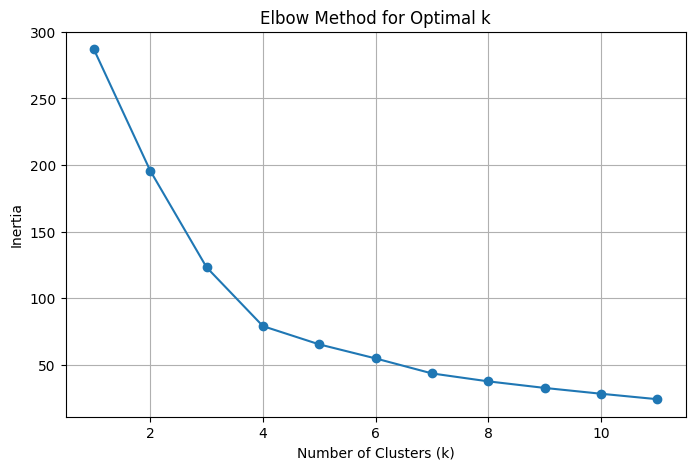

In [36]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': list(k_values), 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [ ]:
# Initialize the K-Means model with the best k value
kmeans_model = KMeans(n_clusters=best_k, random_state=42)


In [38]:
# Fit the K-Means model using the PCA-transformed data
scaled_df_copy['cluster'] = kmeans_model.fit_predict(pca_data)


c:\Users\ntrie\anaconda3\envs\my_dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [39]:
# Predict clusters using the K-Means model on the PCA-transformed data
cluster_labels = kmeans_model.predict(pca_data)

# Print the resulting array of cluster values
print(cluster_labels)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [43]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import hvplot.pandas

# Step 1: Apply PCA to reduce dimensions to 3 principal components
pca = PCA(n_components=3)
pca_data = pca.fit_transform(df_market_data_scaled)

# Step 2: Create a DataFrame from the PCA-transformed data, keeping `coin_id` as the index
pca_df = pd.DataFrame(
    pca_data, 
    columns=['PC1', 'PC2', 'PC3'], 
    index=df_market_data_scaled.index  # Maintain `coin_id` as index
)

# Step 3: Initialize the K-Means model with the best k
kmeans_model = KMeans(n_clusters=best_k, random_state=42)

# Step 4: Fit the K-Means model using the PCA data
kmeans_model.fit(pca_data)

# Step 5: Predict the clusters for grouping the cryptocurrencies
cluster_labels = kmeans_model.predict(pca_data)

# Step 6: Create a copy of the scaled PCA DataFrame, keeping `coin_id` as the index
pca_scaled_copy = pca_df.copy()

# Step 7: Add a new column to the copy of the PCA DataFrame with the predicted clusters
pca_scaled_copy['cluster'] = cluster_labels

# Step 8: Display the copy of the scaled PCA DataFrame
display(pca_scaled_copy.head())





c:\Users\ntrie\anaconda3\envs\my_dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,PC1,PC2,PC3,cluster
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [44]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
import hvplot.pandas

pca_scaled_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='cluster',  # Color points based on clusters
    hover_cols=['index']  # Display `coin_id` when hovering
)


:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,index)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

c:\Users\ntrie\anaconda3\envs\my_dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ntrie\anaconda3\envs\my_dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ntrie\anaconda3\envs\my_dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ntrie\anaconda3\envs\my_dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

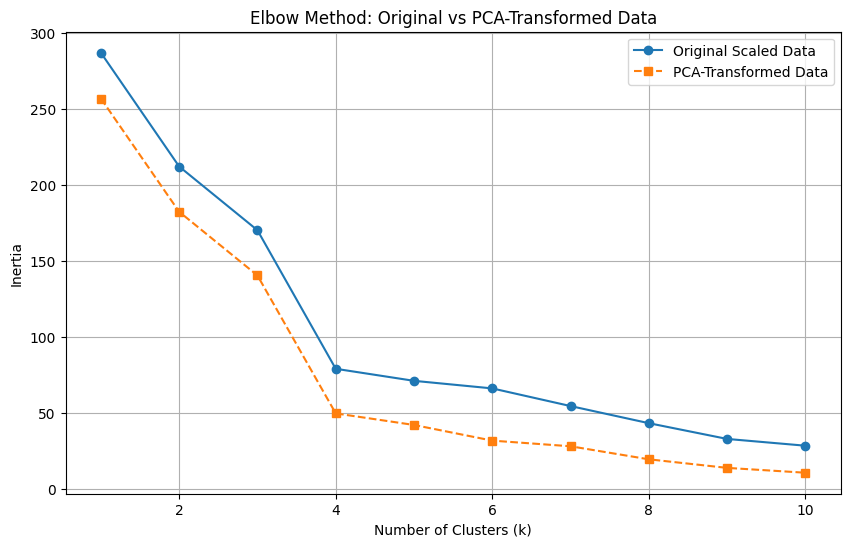

In [45]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the range of k values to test
k_range = range(1, 11)

# Store inertia values for both datasets
inertia_original = []
inertia_pca = []

# Loop through k values and compute inertia for each dataset
for k in k_range:
    # K-Means on original scaled data
    kmeans_original = KMeans(n_clusters=k, random_state=42)
    kmeans_original.fit(df_market_data_scaled)
    inertia_original.append(kmeans_original.inertia_)

    # K-Means on PCA-transformed data
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_pca.fit(pca_data)
    inertia_pca.append(kmeans_pca.inertia_)

# Create the composite Elbow plot
plt.figure(figsize=(10, 6))

# Plot Elbow Curve for Original Scaled Data
plt.plot(k_range, inertia_original, marker='o', linestyle='-', label="Original Scaled Data")

# Plot Elbow Curve for PCA-Transformed Data
plt.plot(k_range, inertia_pca, marker='s', linestyle='--', label="PCA-Transformed Data")

# Formatting the plot
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method: Original vs PCA-Transformed Data")
plt.legend()
plt.grid()

# Show the plot
plt.show()


c:\Users\ntrie\anaconda3\envs\my_dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ntrie\anaconda3\envs\my_dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ntrie\AppData\Local\Temp\ipykernel_12088\3704616453.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


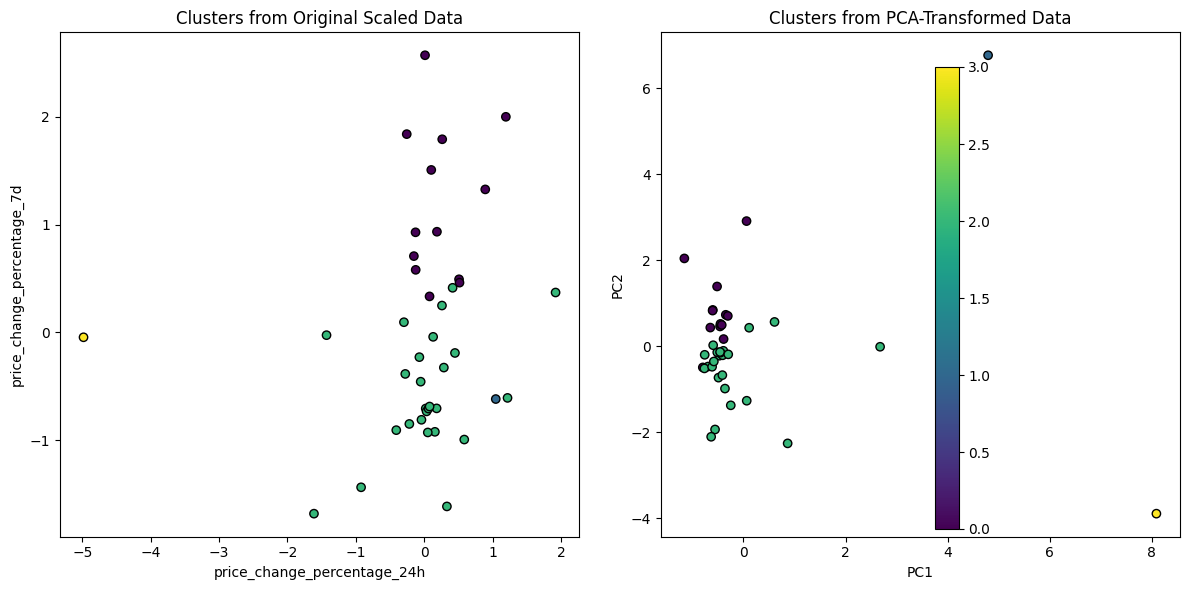

In [46]:
import matplotlib.pyplot as plt

# Retrieve cluster labels for both datasets
cluster_labels_original = KMeans(n_clusters=best_k, random_state=42).fit_predict(df_market_data_scaled)
cluster_labels_pca = KMeans(n_clusters=best_k, random_state=42).fit_predict(pca_data)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Clusters from Original Scaled Data
scatter1 = axes[0].scatter(
    df_market_data_scaled.iloc[:, 0], df_market_data_scaled.iloc[:, 1], 
    c=cluster_labels_original, cmap='viridis', edgecolors='k'
)
axes[0].set_title("Clusters from Original Scaled Data")
axes[0].set_xlabel(df_market_data_scaled.columns[0])
axes[0].set_ylabel(df_market_data_scaled.columns[1])

# Plot Clusters from PCA-Transformed Data
scatter2 = axes[1].scatter(
    pca_data[:, 0], pca_data[:, 1], 
    c=cluster_labels_pca, cmap='viridis', edgecolors='k'
)
axes[1].set_title("Clusters from PCA-Transformed Data")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

# Add a color bar
fig.colorbar(scatter2, ax=axes, orientation='vertical')

# Show the plot
plt.tight_layout()
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 
Using fewer features via PCA can improve clustering by removing noise and redundant data, leading to better-defined clusters and faster computation. However, it may also discard important information, potentially reducing clustering accuracy and altering cluster boundaries. The impact depends on the dataset—if key patterns are preserved, PCA enhances K-Means, but if too much variance is lost, clustering becomes less meaningful. 